In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

C:\Users\nanot\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nanot\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nanot\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nanot\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

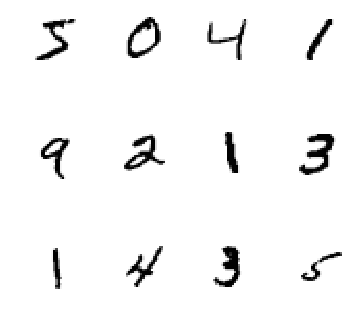

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

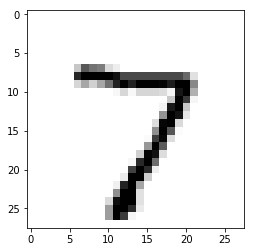

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
# X_valid[0]

In [11]:
y_valid[0]

7

##### Preprocess data

In [12]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784) + 64

50240

In [21]:
(10*64) + 10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [23]:
X_train.shape

(60000, 784)

In [24]:
y_train.shape

(60000, 10)

#### Train!

In [25]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0926 - acc: 0.0885 - val_loss: 0.0921 - val_acc: 0.0946
Epoch 2/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0918 - acc: 0.0994 - val_loss: 0.0915 - val_acc: 0.1029
Epoch 3/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0912 - acc: 0.1065 - val_loss: 0.0909 - val_acc: 0.1127
Epoch 4/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0907 - acc: 0.1171 - val_loss: 0.0905 - val_acc: 0.1260
Epoch 5/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0903 - acc: 0.1375 - val_loss: 0.0901 - val_acc: 0.1494
Epoch 6/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0899 - acc: 0.1630 - val_loss: 0.0897 - val_acc: 0.1757
Epoch 7/200
60000/60000 [==============================] - 2s 

Epoch 57/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0704 - acc: 0.5469 - val_loss: 0.0699 - val_acc: 0.5547
Epoch 58/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0699 - acc: 0.5523 - val_loss: 0.0694 - val_acc: 0.5613
Epoch 59/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0694 - acc: 0.5573 - val_loss: 0.0689 - val_acc: 0.5677
Epoch 60/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0689 - acc: 0.5625 - val_loss: 0.0684 - val_acc: 0.5722
Epoch 61/200
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0684 - acc: 0.5678 - val_loss: 0.0679 - val_acc: 0.5763
Epoch 62/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0679 - acc: 0.5728 - val_loss: 0.0674 - val_acc: 0.5802
Epoch 63/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0674 - acc: 0.5777 - val_loss: 0.0669 - val_acc: 0.5844
Epoch 64/200


Epoch 115/200
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0466 - acc: 0.7076 - val_loss: 0.0458 - val_acc: 0.7144
Epoch 116/200
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0463 - acc: 0.7092 - val_loss: 0.0455 - val_acc: 0.7167
Epoch 117/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0460 - acc: 0.7110 - val_loss: 0.0452 - val_acc: 0.7196
Epoch 118/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0457 - acc: 0.7129 - val_loss: 0.0449 - val_acc: 0.7218
Epoch 119/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0454 - acc: 0.7156 - val_loss: 0.0446 - val_acc: 0.7232
Epoch 120/200
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0451 - acc: 0.7177 - val_loss: 0.0443 - val_acc: 0.7262
Epoch 121/200
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0448 - acc: 0.7206 - val_loss: 0.0440 - val_acc: 0.7282
Epoch 

Epoch 173/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0332 - acc: 0.8406 - val_loss: 0.0323 - val_acc: 0.8475
Epoch 174/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0331 - acc: 0.8413 - val_loss: 0.0321 - val_acc: 0.8483
Epoch 175/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0329 - acc: 0.8425 - val_loss: 0.0319 - val_acc: 0.8487
Epoch 176/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0327 - acc: 0.8435 - val_loss: 0.0318 - val_acc: 0.8492
Epoch 177/200
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0326 - acc: 0.8445 - val_loss: 0.0316 - val_acc: 0.8502
Epoch 178/200
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0324 - acc: 0.8452 - val_loss: 0.0315 - val_acc: 0.8506
Epoch 179/200
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0323 - acc: 0.8460 - val_loss: 0.0313 - val_acc: 0.8511
Epoch 

#### Evaluating model performance

In [26]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0284 - acc: 0.8635


[0.02839024303853512, 0.8635]

#### Performing inference

In [27]:
valid_0 = X_valid[0].reshape(1,784)

In [28]:
model.predict(valid_0)

array([[0.00312072, 0.00173495, 0.00435913, 0.00807031, 0.00709541,
        0.00826222, 0.00119123, 0.91885656, 0.00374568, 0.04356375]],
      dtype=float32)

In [29]:
model.predict_classes(valid_0)

array([7], dtype=int64)